In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
pip install xgboost scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
training_df=pd.read_csv("Trout_training.csv")

In [7]:
training_df

,Date_Time,Water_Temp_C,Depth_m
0,04/20/2012 00:00,5.257,1.5
1,04/20/2012 00:00,5.257,2.5
2,04/20/2012 00:00,5.257,3.5
3,04/20/2012 00:00,5.205,4.5
4,04/20/2012 00:00,5.205,5.5
...,...,...,...
839210,04/19/2018 23:00,1.534,12.5
839211,04/19/2018 23:00,1.724,14.5
839212,04/19/2018 23:00,1.778,16.5
839213,04/19/2018 23:00,2.155,18.5


In [9]:
training_df.head(50)

,Date_Time,Water_Temp_C,Depth_m
0,04/20/2012 00:00,5.257,1.5
1,04/20/2012 00:00,5.257,2.5
2,04/20/2012 00:00,5.257,3.5
3,04/20/2012 00:00,5.205,4.5
4,04/20/2012 00:00,5.205,5.5
5,04/20/2012 00:00,5.154,6.5
6,04/20/2012 00:00,5.231,7.5
7,04/20/2012 00:00,5.128,8.5
8,04/20/2012 00:00,5.102,9.5
9,04/20/2012 00:00,5.076,10.5


In [49]:
training_df['Date_Time'] = pd.to_datetime(training_df['Date_Time'])

**EDA**

<Axes: xlabel='Depth_m', ylabel='Water_Temp_C'>

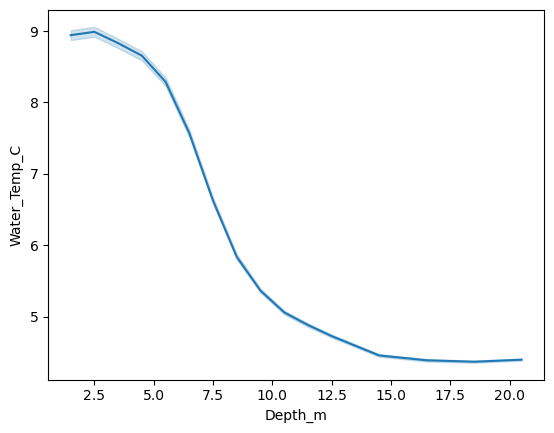

In [14]:
sns.lineplot(training_df,x='Depth_m', y='Water_Temp_C')

In [15]:
training_df.isnull().sum()

Date_Time       0
Water_Temp_C    0
Depth_m         0
dtype: int64

<Axes: xlabel='Date_Time'>

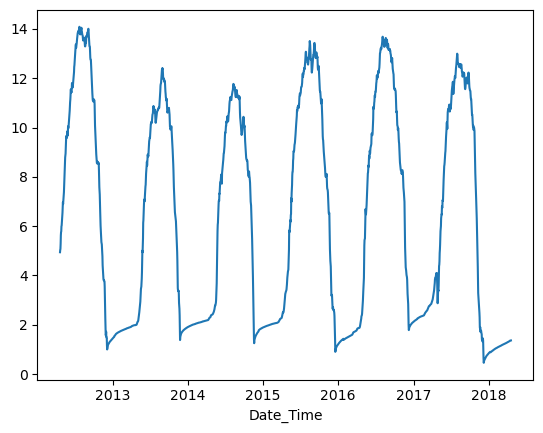

In [16]:
training_df.groupby(training_df['Date_Time'].dt.date)['Water_Temp_C'].mean().plot()

<Axes: xlabel='Date_Time'>

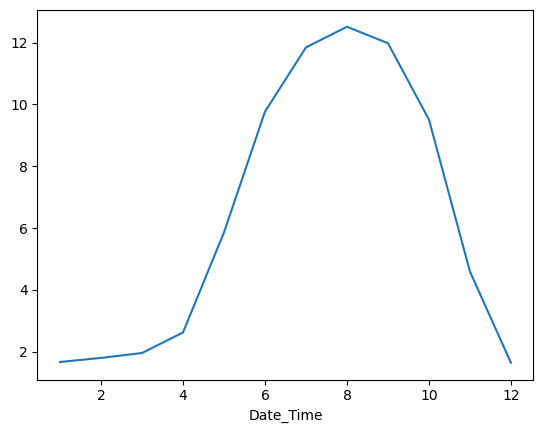

In [17]:
training_df.groupby(training_df['Date_Time'].dt.month)['Water_Temp_C'].mean().plot()

<Axes: xlabel='Date_Time'>

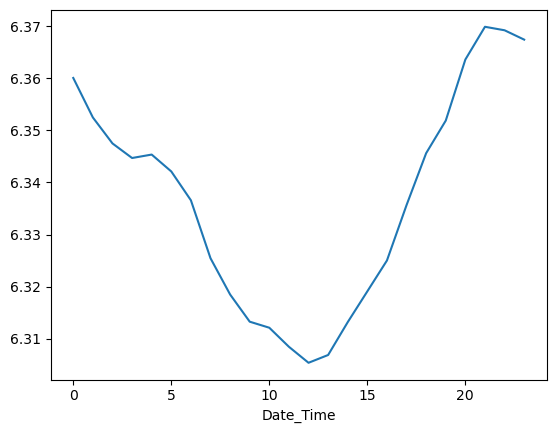

In [18]:
training_df.groupby(training_df['Date_Time'].dt.hour)['Water_Temp_C'].mean().plot()

**MODEL BUILD**

In [51]:
training_df['Month']=training_df['Date_Time'].dt.month

In [53]:
training_df['Hour']=training_df['Date_Time'].dt.hour

In [55]:
training_df['Year']=training_df['Date_Time'].dt.year

In [57]:
training_df['Day']=training_df['Date_Time'].dt.day

In [59]:
training_df['Temp_1m_Below']=training_df['Water_Temp_C'].shift(1)

In [61]:
training_df['Temp_1m_Above']=training_df['Water_Temp_C'].shift(-1)

In [63]:
# training_df['Avg_Temp_Above_Below']= 

In [65]:
training_df['Monthly_Avg_Temp'] = training_df.groupby(['Month','Year'])['Water_Temp_C'].transform('mean')

In [67]:
training_df['Daily_Avg_Temp']=training_df.groupby(['Day','Month','Year'])['Water_Temp_C'].transform('mean')

In [69]:
training_df.head(17)

,Date_Time,Water_Temp_C,Depth_m,Month,Hour,Year,Day,Temp_1m_Below,Temp_1m_Above,Monthly_Avg_Temp,Daily_Avg_Temp
0,2012-04-20 00:00:00,5.257,1.5,4,0,2012,20,NaN,5.257,5.630574,4.941685
1,2012-04-20 00:00:00,5.257,2.5,4,0,2012,20,5.257,5.257,5.630574,4.941685
2,2012-04-20 00:00:00,5.257,3.5,4,0,2012,20,5.257,5.205,5.630574,4.941685
3,2012-04-20 00:00:00,5.205,4.5,4,0,2012,20,5.257,5.205,5.630574,4.941685
4,2012-04-20 00:00:00,5.205,5.5,4,0,2012,20,5.205,5.154,5.630574,4.941685
5,2012-04-20 00:00:00,5.154,6.5,4,0,2012,20,5.205,5.231,5.630574,4.941685
6,2012-04-20 00:00:00,5.231,7.5,4,0,2012,20,5.154,5.128,5.630574,4.941685
7,2012-04-20 00:00:00,5.128,8.5,4,0,2012,20,5.231,5.102,5.630574,4.941685
8,2012-04-20 00:00:00,5.102,9.5,4,0,2012,20,5.128,5.076,5.630574,4.941685
9,2012-04-20 00:00:00,5.076,10.5,4,0,2012,20,5.102,4.792,5.630574,4.941685


In [71]:
month_one_hot = pd.get_dummies(training_df['Month'], prefix='Month')

In [73]:
hour_one_hot = pd.get_dummies(training_df['Hour'], prefix='Hour')

In [75]:
training_df=pd.concat([training_df,month_one_hot,hour_one_hot],axis=1)

In [77]:
training_df.drop(['Month','Hour','Date_Time','Year','Day'],axis=1,inplace=True)

In [79]:
training_df.dropna(inplace=True)

In [81]:
training_df=training_df[training_df['Depth_m']==10.5]

In [83]:
Y=training_df['Water_Temp_C']
X=training_df.drop('Water_Temp_C',axis=1)

In [85]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0)

**MODEL #1**

In [88]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [90]:
y_pred=linreg.predict(x_test)

In [92]:
mse=mean_squared_error(y_test,y_pred)

In [94]:
mse

0.07965933852477622

**MODEL #2(Trying Polynomial Features)**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degrees=[1,3,6,9]

scores = {}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)

    x_train_numeric=x_train[['Depth_m','Temp_1m_Below','Temp_1m_Above']]
    X_train_poly = poly.fit_transform(x_train_numeric)

    x_train_encoded = x_train.drop(columns=['Depth_m', 'Temp_1m_Below', 'Temp_1m_Above'])
    X_train_combined = pd.concat([pd.DataFrame(X_train_poly), x_train_encoded.reset_index(drop=True)], axis=1)
    X_train_combined.columns = X_train_combined.columns.astype(str)
    
    # Fit Model
    model = XGBRegressor(objective='reg:squarederror',alpha=1, lambda_=1)
    model.fit(X_train_combined, y_train)

    # Transform the x_vals to polynomial features for prediction
    x_test_numeric = x_test[['Depth_m', 'Temp_1m_Below', 'Temp_1m_Above']]
    X_test_poly = poly.transform(x_test_numeric)

    x_test_encoded = x_test.drop(columns=['Depth_m', 'Temp_1m_Below', 'Temp_1m_Above'])
    X_test_combined = pd.concat([pd.DataFrame(X_test_poly), x_test_encoded.reset_index(drop=True)], axis=1)
    X_test_combined.columns = X_test_combined.columns.astype(str)
    
    
    y_pred = model.predict(X_test_combined)

    mse=mean_squared_error(y_test,y_pred)

    scores[degree]=mse
print(scores)


**MODEL 3(Randomized Search)**

In [96]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [98]:
model = XGBRegressor(objective='reg:squarederror',alpha=1, lambda_=1)
param_dist = {
    'max_depth': [3, 5, 6],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=50, scoring='neg_mean_squared_error', 
                                   cv=3, verbose=1, n_jobs=-1)

random_search.fit(x_train, y_train)

best_model = random_search.best_estimator_

y_pred= best_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/Users/narenedara/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/narenedara/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [11:31:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


0.015826568444388702


In [100]:
y_test

55225      9.780
270731     2.396
771352    10.296
436583     7.242
113023     1.805
           ...  
207979     9.706
39394      9.262
765248     9.410
294506     5.024
620884     8.841
Name: Water_Temp_C, Length: 13127, dtype: float64

In [102]:
y_pred

array([ 9.813945 ,  2.4079895, 10.369939 , ...,  9.46764  ,  5.032155 ,
        8.712416 ], dtype=float32)

**Model Pipeline**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Define your models
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror')
}

# Prepare a DataFrame to store results
results = []


poly = PolynomialFeatures(degree=6)

# Loop through each model and evaluate
for model_name, model in models.items():
    
    # Fit the pipeline on training data
    model.fit(x_train, y_train)
    
    # Predict on the test data
    predictions = model.predict(x_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, predictions)
    
    # Append results to DataFrame
    results.append({'Model': model_name, 'MSE': mse})

results_df = pd.DataFrame(results)

# Print the results
print(results_df)


**SUBMISSION**

In [104]:
df=pd.read_csv("Trout_testing_features.csv")

In [106]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Prepare new rows to insert
new_rows = pd.DataFrame({
    'Date_Time': df['Date_Time'].unique(),
    'Water_Temp_C': np.nan,
    'Depth_m': 10.5
})

# Create a new DataFrame to hold the modified rows
new_df = pd.DataFrame()

# Iterate over unique Date_Time values
for time in df['Date_Time'].unique():
    # Get the rows corresponding to the current time
    temp_df = df[df['Date_Time'] == time]
    
    # Insert new row for 10.5m between 9.5m and 11.5m
    if any(temp_df['Depth_m'] == 9.5) and any(temp_df['Depth_m'] == 11.5):
        # Get index positions of 9.5m and 11.5m
        idx_9_5 = temp_df[temp_df['Depth_m'] == 9.5].index[0]
        idx_11_5 = temp_df[temp_df['Depth_m'] == 11.5].index[0]
        
        # Concatenate rows before 9.5m, 10.5m row, and rows after 9.5m
        temp_df = pd.concat([
            temp_df.loc[:idx_9_5],
            new_rows[new_rows['Date_Time'] == time].reset_index(drop=True),
            temp_df.loc[idx_11_5:]
        ], ignore_index=True)

    # Append modified temp_df to new_df
    new_df = pd.concat([new_df, temp_df], ignore_index=True)


In [107]:
df_combined=new_df

In [110]:
# Convert 'Date_Time' to datetime
df_combined['Date_Time'] = pd.to_datetime(df_combined['Date_Time'])

# Extract Month and Hour once
df_combined['Month'] = df_combined['Date_Time'].dt.month
df_combined['Hour'] = df_combined['Date_Time'].dt.hour
df_combined['Year'] = df_combined['Date_Time'].dt.year
df_combined['Day'] = df_combined['Date_Time'].dt.day
# Create shifted temperature columns
df_combined['Temp_1m_Below'] = df_combined['Water_Temp_C'].shift(1)
df_combined['Temp_1m_Above'] = df_combined['Water_Temp_C'].shift(-1)

# Calculate Monthly Average Temperature
df_combined['Monthly_Avg_Temp'] = df_combined.groupby(['Month','Year'])['Water_Temp_C'].transform('mean')
df_combined['Daily_Avg_Temp'] = df_combined.groupby(['Day','Month','Year'])['Water_Temp_C'].transform('mean')

# One-hot encoding for Month and Hour
df_combined = pd.concat([
    df_combined,
    pd.get_dummies(df_combined['Month'], prefix='Month'),
    pd.get_dummies(df_combined['Hour'], prefix='Hour')
], axis=1)

# Drop unnecessary columns and filter for Depth_m == 10.5
df_combined = df_combined.drop(['Month', 'Hour', 'Date_Time','Year','Day'], axis=1)



In [114]:
df_combined.head(50)

,Water_Temp_C,Depth_m,Temp_1m_Below,Temp_1m_Above,Monthly_Avg_Temp,Daily_Avg_Temp,Month_1,Month_2,Month_3,Month_4,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0.412,1.5,NaN,0.852,1.615121,1.370439,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0.852,2.5,0.412,0.907,1.615121,1.370439,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.907,3.5,0.852,0.962,1.615121,1.370439,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0.962,4.5,0.907,1.071,1.615121,1.370439,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1.071,5.5,0.962,0.989,1.615121,1.370439,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,0.989,6.5,1.071,1.289,1.615121,1.370439,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,1.289,7.5,0.989,1.289,1.615121,1.370439,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7,1.289,8.5,1.289,1.453,1.615121,1.370439,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8,1.453,9.5,1.289,NaN,1.615121,1.370439,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,NaN,10.5,1.453,1.561,1.615121,1.370439,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [116]:
df_combined=df_combined[df_combined['Depth_m']==10.5]

In [118]:
X_test = df_combined.drop(columns=['Water_Temp_C'])

In [124]:
X_test.head(50)

,Depth_m,Temp_1m_Below,Temp_1m_Above,Monthly_Avg_Temp,Daily_Avg_Temp,Month_1,Month_2,Month_3,Month_4,Month_5,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
9,10.5,1.453,1.561,1.615121,1.370439,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
25,10.5,1.453,1.561,1.615121,1.370439,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
41,10.5,1.453,1.561,1.615121,1.370439,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
57,10.5,1.453,1.561,1.615121,1.370439,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
73,10.5,1.453,1.561,1.615121,1.370439,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
89,10.5,1.453,1.561,1.615121,1.370439,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
105,10.5,1.453,1.561,1.615121,1.370439,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
121,10.5,1.453,1.561,1.615121,1.370439,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
137,10.5,1.453,1.561,1.615121,1.370439,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
153,10.5,1.453,1.561,1.615121,1.370439,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [126]:
predictions=best_model.predict(X_test)

In [128]:
df=pd.read_csv("Trout_testing_features.csv")

In [130]:
pred_dates = df['Date_Time'].unique()  # Get unique Date_Times
pred_df = pd.DataFrame({
    'Date_Time': pred_dates,
    'Water_Temp_C': predictions
})

In [132]:
pred_df

/Users/narenedara/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [11:31:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/narenedara/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [11:31:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/narenedara/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [11:31:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/narenedara/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [11:31:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/narenedar

,Date_Time,Water_Temp_C
0,04/20/2018 00:00,1.408110
1,04/20/2018 01:00,1.408110
2,04/20/2018 02:00,1.408141
3,04/20/2018 03:00,1.408110
4,04/20/2018 04:00,1.408110
...,...,...
8755,04/19/2019 19:00,3.613671
8756,04/19/2019 20:00,3.612048
8757,04/19/2019 21:00,3.612048
8758,04/19/2019 22:00,3.612048


In [134]:
training_df[training_df['Depth_m']==10.5].tail(50)

,Water_Temp_C,Depth_m,Temp_1m_Below,Temp_1m_Above,Monthly_Avg_Temp,Daily_Avg_Temp,Month_1,Month_2,Month_3,Month_4,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
838424,1.371,10.5,1.453,1.534,1.326748,1.360352,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
838440,1.371,10.5,1.453,1.534,1.326748,1.360352,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
838456,1.371,10.5,1.453,1.534,1.326748,1.360708,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
838472,1.371,10.5,1.453,1.534,1.326748,1.360708,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
838488,1.398,10.5,1.453,1.534,1.326748,1.360708,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
838504,1.371,10.5,1.453,1.534,1.326748,1.360708,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
838520,1.371,10.5,1.453,1.534,1.326748,1.360708,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
838536,1.371,10.5,1.453,1.534,1.326748,1.360708,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
838552,1.371,10.5,1.453,1.534,1.326748,1.360708,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
838568,1.371,10.5,1.453,1.534,1.326748,1.360708,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [136]:
pred_df.to_csv('predictions.csv', index=False)